### Histogram

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

In [1]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy import stats


x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(1, 1, 1000)
c = np.random.choice(['1','2'], 1000)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'c':c})

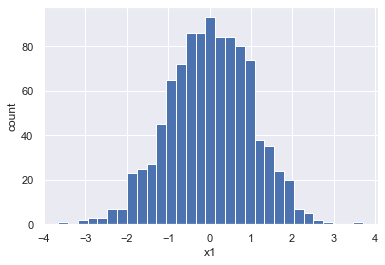

In [2]:
# Set default Seaborn style
sns.set()

# Compute number of data points: n_data
n_data = len(x1)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(x1, bins=n_bins)

# Label axes
_ = plt.xlabel('x1')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### BeeSwarm 
Compare a proprety over classes

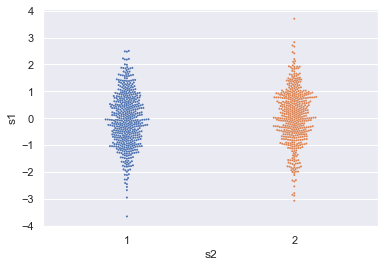

In [3]:
# Create bee swarm plot with Seaborn's default settings
sns.set()
_ = sns.swarmplot(x='c', y='x1', data=df, s=2)

# Label the axes
_ = plt.xlabel('s2')
_ = plt.ylabel('s1')

# Show the plot
plt.show()

### ECDF


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

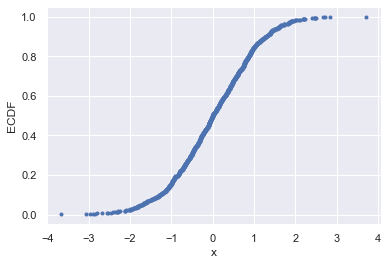

In [5]:
x_vers, y_vers = ecdf(x1)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('x')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

### Quantitative Exploratory Data Analysis

In [6]:
# mean
np.mean(x1)

0.007233411820538023

In [7]:
# percentiles
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,  25.,  50.,  75.,  97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(x1, percentiles)

# Print the result
print(ptiles_vers)

[-1.99213987 -0.67597586  0.00532469  0.7452308   1.89585037]


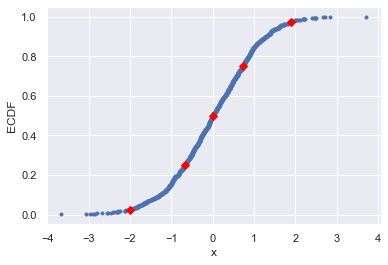

In [8]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('x')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

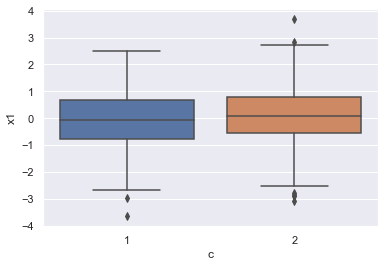

In [9]:
# Create box plot with Seaborn's default settings
sns.set()
_ = sns.boxplot(x='c', y='x1', data=df)

# Label the axes
_ = plt.xlabel('c')
_ = plt.ylabel('x1')


# Show the plot
plt.show()

In [10]:
# variance 
np.var(x1)

1.0244296315666188

### Scatter Plot 
Compare two properties of a single species

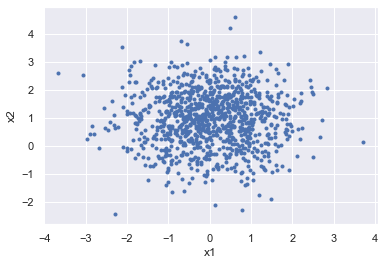

In [11]:
# Make a scatter plot
plt.plot(x1, x2, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

# Show the result
plt.show()

In [12]:
# covariance matrix 
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x1,x2)

# Print covariance matrix
print(covariance_matrix)

petal_cov = covariance_matrix[0,1]

# Print the x1/x2
print(petal_cov)

[[ 1.02545509 -0.00880762]
 [-0.00880762  0.99999863]]
-0.008807621135822495


In [13]:
# Pearson Coefficient 
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x1,x2)

# Print the result
print(r)

-0.008697623440267609


### Bernoulli and Binomial
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1 − p of landing tails (failure). 

In [14]:
# Binomial distribution 
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

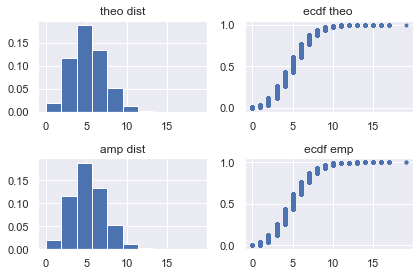

In [15]:
# simulate BINOMIAL DISTRIBUTION 
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000000)

# Compute the number of defaults
for i in range(1000000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

# Take 1000000 samples out of the binomial distribution: n_defaults
n_defaults_t = np.random.binomial(n=100, p=0.05, size=1000000)


x, y = ecdf(n_defaults)
x_t, y_t = ecdf(n_defaults_t)



fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(n_defaults_t, density=True)
axs[0, 0].set_title('theo dist')

axs[1, 0].hist(n_defaults, density=True)
axs[1, 0].set_title('amp dist')

axs[0, 1].plot(x_t,y_t, marker = '.', linestyle = 'none')
axs[0, 1].set_title("ecdf theo ")

axs[1, 1].plot(x,y, marker = '.', linestyle = 'none')
axs[1, 1].set_title("ecdf emp")

fig.tight_layout()



The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

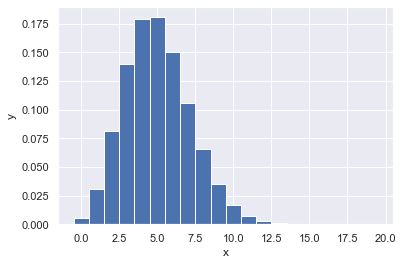

In [16]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

### Relationship between Binomial and Poisson distributions
When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval.

In [17]:
# calculate proba
# 1- draw n observation from the appropriate distribution
# 2- count observation satisfying the condition 
# 3- count/n

#exp:

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


### Achtung 
we consider the probability distribution for the number of success of a rare event as poisson distribution , but the probability distribution of the time between rare events is exponential distribution.

### Kolmogorov-Smirnov test 

In [18]:
print(stats.kstest(x1, x2))
print("x1 and x2 are not the same")

KstestResult(statistic=0.362, pvalue=1.278517400590018e-58)
x1 and x2 are not the same


### Shapiro Wilk test 

In [19]:
print(stats.shapiro(x1))
print("x1 is gaussian distribution")

ShapiroResult(statistic=0.9985617995262146, pvalue=0.5954477787017822)
x1 is gaussian distribution


### Wilcoxon's signed-rank test 

In [20]:
print(stats.wilcoxon(x1, x2))
print("x1 and x2 are not the same")

WilcoxonResult(statistic=87435.0, pvalue=4.759491606001301e-71)
x1 and x2 are not the same


### The Mann-Whitney U test

In [21]:
print(stats.mannwhitneyu(x1,x2))
print("x1 and x2 are not the same")

MannwhitneyuResult(statistic=254098.0, pvalue=7.5548666163757465e-81)
x1 and x2 are not the same


### Linear Regression 

In [22]:
x = np.random.rand(100)

In [23]:
y = 2.3*x + 4 + np.random.normal(0,1,100)

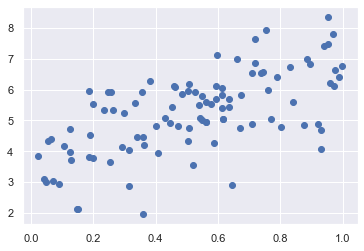

In [24]:
plt.scatter(x,y)

slope = 3.1024503580033587
intercept = 3.625537208908811


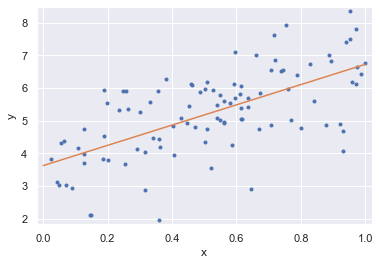

In [25]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(x, y , marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
xx = np.array([0,1])
yy = a * xx + b

# Add regression line to your plot
_ = plt.plot(xx, yy)

# Draw the plot
plt.show()

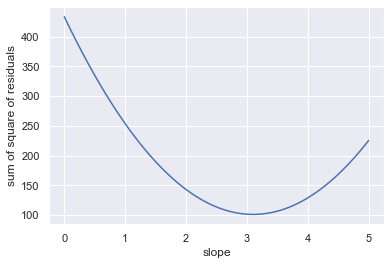

In [26]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 5, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((y - a*x - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope')
plt.ylabel('sum of square of residuals')

plt.show()

### Bootstrap Simples

In [27]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

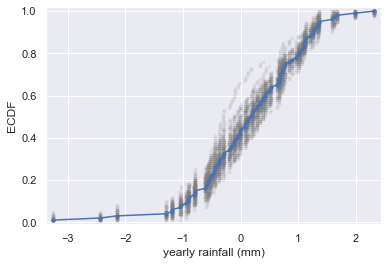

In [28]:
t = np.random.normal(0,1,100)

for i in range(50):
    # Compute and plot ECDF from bootstrap sample
    x, y = bootstrap_replicate_1d(t, ecdf)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(t)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [29]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.09233181812496638
0.09254165091963412
95% confidence interval = [-0.01815632  0.34834056]


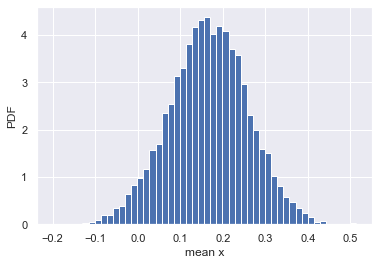

In [30]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(x, np.mean, 10000)

# Compute and print Standard Error
sem = np.std(x) / np.sqrt(len(x))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean x')
_ = plt.ylabel('PDF')

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int)


# Show the plot
plt.show()

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points.<br>
***RK***: variance is not normally distributed

### Pairs Bootstrap

In [31]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.25667099 0.35347943]


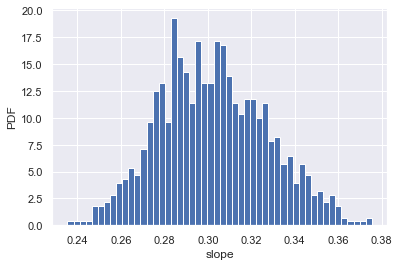

In [32]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x, y, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

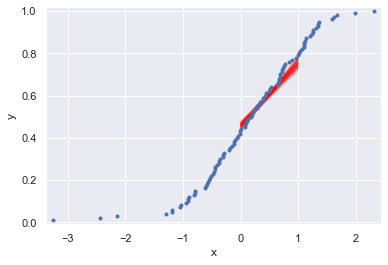

In [33]:
# Generate array of x-values for bootstrap lines: x
xx = np.array([0, 1])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(xx, 
                 bs_slope_reps[i]*xx + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(x,y, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

### Permutation Sample

In [34]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

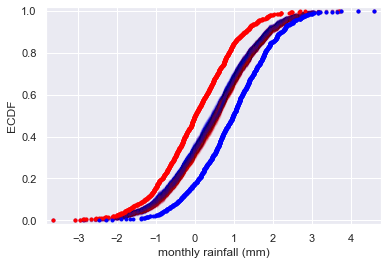

In [35]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(x1,x2)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(x1)
x_2, y_2 = ecdf(x2)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## What is a p-value?
The p-value is generally a measure of: the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

## Generating permutation replicates


In [36]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Hypothesis Testing (mean difference)

In [50]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(x2, x1)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(x1, x2,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


The p-value tells us that there is about a 0% chance that you would get the difference of means observed in the experiment if x1 and x2 were exactly the same